[[109905.55555556   7325.69444444]
 [ 23539.13043478   5272.01086957]
 [ 63915.27777778   6140.625     ]]
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


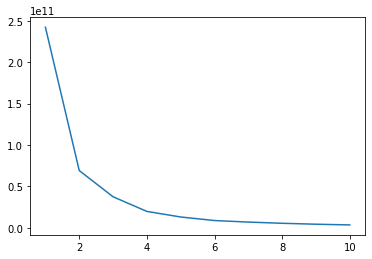

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 0 1 0 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 0 0 2 0 2 2 1 1 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 0 0 1 2 2 2 1 1 0 0 0 1 2 2 0 2 0 1 2 1 2 0 2 2 1 0 0 2 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 0 2 1 0 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 0 1 1 0 1 0 0
 0 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


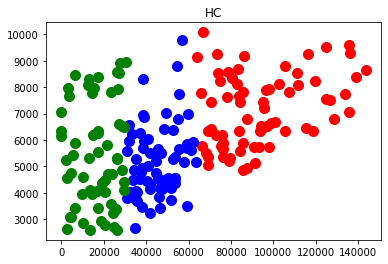

[2 2 2 1 1 1 1 2 1 3 3 2 3 1 2 0 2 1 2 2 1 1 2 3 0 3 1 2 1 3 1 3 3 2 3 3 3
 1 3 0 0 1 2 1 1 3 3 3 3 0 1 2 0 0 2 2 1 2 3 2 0 2 3 1 3 1 3 2 3 1 2 2 2 2
 1 1 0 2 3 1 1 1 3 3 0 2 2 3 1 1 2 1 0 3 1 3 1 2 1 1 3 0 2 1 1 2 2 3 3 0 0
 2 2 2 2 3 1 2 3 3 1 3 2 2 2 3 1 1 0 1 1 3 3 3 3 1 3 3 2 3 2 1 3 3 2 3 3 3
 3 1 3 3 2 1 3 0 1 3 0 1 3 3 3 3 1 3 3 2 1 1 2 1 1 3 2 1 1 3 0 3 3 2 3 0 2
 0 1 1 3 1 3 1 3 2 1 2 2 3 3 3]


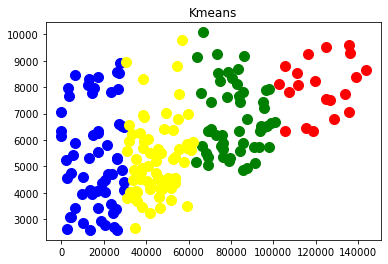

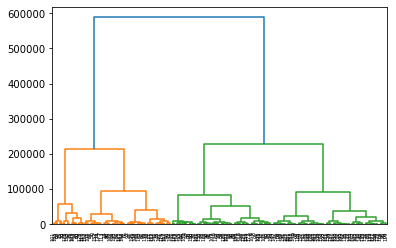

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler = pd.read_csv('musteriler.csv')

X = veriler.iloc[:,3:].values

#kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

print(kmeans.cluster_centers_)
#center point of k-means clusters


print("----------")
sonuclar = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init='k-means++', random_state= 123)
    # cluster_n number of class,
    # random state: in every i value, cluster random value is gonna start a certain point
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)
    #wcss values 
    """
    inertia_, K-means modelinin bir özelliğidir ve inertia değerini temsil eder.
    İnertia, kümeleme modelinin her bir veri noktasının kendisine en yakın küme
    merkeziyle olan uzaklıklarının toplamını ifade eder.
 
    Yukarıdaki kodda, K-means modeli kmeansin inertia_ özelliği kullanılarak inertia 
    değeri elde edilir. Bu inertia değeri, daha sonra sonuclar listesine eklenir.
    """
plt.plot(range(1,11),sonuclar) 
#plotting of wcss, With WCSS we can analyze the 
plt.show()



#hiyelarşik clastering 
#agglomareting clastering 
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

Y_tahmin = ac.fit_predict(X)
print(Y_tahmin)
#Y_tahmin show us where every datasets locate in cluster. 

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title("HC")
plt.show()



#----------------------------------------------------------------------
#KMEANS TAHMİNİ
kmeans = KMeans (n_clusters = 4, init='k-means++', random_state= 123)
Y_tahmin = kmeans.fit_predict(X)
print(Y_tahmin)
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='b')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title("Kmeans")
plt.show()


#----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(X,method="ward"))
#dendogram kullanırken ward mesafesini kullanıyoruz.
plt.show()















In [3]:
sonuclar

[242389902746.875,
 69083288306.74911,
 37362865661.973114,
 19665039712.79501,
 12911353632.710129,
 8631933632.939518,
 6759928141.384079,
 5301517432.980303,
 4172822197.446948,
 3330255811.549153]

In [14]:
X[Y_tahmin==1,0]#Y TAHMİN DEĞERİ 1 OLAN SATIR NUMARALARI SEÇİLECEKTİR. 

array([31800, 59200, 46200, 51800, 40800, 37200, 34500, 47100, 35400,
       41100, 46400, 50100, 35900, 41600, 61000, 52800, 35700, 45900,
       54400, 58000, 32100, 38400, 37900, 51900, 34500, 55200, 55700,
       38400, 33600, 61900, 42000, 34700, 56800, 53800, 45400, 48600,
       51600, 59200, 53500, 44800, 49200, 52500, 38700, 59400, 45800,
       31200, 35300, 38000, 32400, 40400, 49200, 41800, 46400, 31200,
       37100, 37400, 53600, 39000, 63500, 53600, 55400, 44700, 59700,
       33300, 44700, 39200, 34000, 42000, 47600], dtype=int64)

In [10]:
X

array([[ 69900,   6325],
       [ 79000,   5200],
       [ 85500,   7825],
       [ 17100,   8375],
       [  5500,   5450],
       [ 27200,   8550],
       [ 20500,   4500],
       [ 69000,   5050],
       [ 13200,   8325],
       [ 31800,   5975],
       [ 59200,   5700],
       [ 95800,   6475],
       [ 46200,   3850],
       [ 29800,   4100],
       [ 83000,   8125],
       [143500,   8650],
       [ 91300,   5125],
       [  9800,   3950],
       [ 79500,   5325],
       [ 66400,   5775],
       [ 25900,   3400],
       [     0,   7075],
       [ 90900,   5725],
       [ 51800,   4300],
       [126800,   7500],
       [ 40800,   5000],
       [ 26400,   5325],
       [ 76100,   5350],
       [ 26500,   2600],
       [ 37200,   6250],
       [  4000,   3075],
       [ 34500,   4875],
       [ 47100,   5525],
       [ 95600,   7225],
       [ 35400,   5275],
       [ 41100,   6050],
       [ 46400,   3425],
       [ 10400,   4600],
       [ 50100,   4575],
       [111300,   8525],


In [23]:
sonuclar

[242389902746.875,
 69083288306.74911,
 37362865661.973114,
 19665039712.79501,
 12911353632.710129,
 8631933632.939518,
 6759928141.384079,
 5301517432.980303,
 4172822197.446948,
 3330255811.549153]